In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [154]:
df=pd.read_csv("insurance.csv")

In [155]:
df.shape

(1338, 7)

In [156]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [157]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [159]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [160]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [161]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [162]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['sex', 'smoker', 'region']

In [163]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['age', 'bmi', 'children', 'charges']

In [164]:
#Encoding
!pip install category_encoders

In [165]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=categorical_cols)
df=encoder.fit_transform(df)

In [166]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [167]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520


In [168]:
# Split the data into features (X) and target (y)
df.columns = df.columns.str.strip() 
X = df.drop(['charges','sex'], axis=1) 
y = df['charges']

In [169]:
# scaling the input feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,age,bmi,children,smoker,region
0,-1.438764,-0.453320,-0.908614,-1.970587,-1.343905
1,-1.509965,0.509621,-0.078767,0.507463,-0.438495
2,-0.797954,0.383307,1.580926,0.507463,-0.438495
3,-0.441948,-1.305531,-0.908614,0.507463,0.466915
4,-0.513149,-0.292556,-0.908614,0.507463,0.466915


In [170]:
# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
X_train.shape,y_train.shape

((1070, 5), (1070,))

In [172]:
X_test.shape,y_test.shape

((268, 5), (268,))

In [173]:
# applyng the Random Forest Classifier algorithm
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)
from sklearn.tree import DecisionTreeRegressor
dt_model= DecisionTreeRegressor(criterion='absolute_error',max_leaf_nodes=10,max_depth=5)
dt_model.fit(X_train, y_train)
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=10,metric='euclidean')
knn_model.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=10)

In [174]:
#model prediction
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
knn_pred= knn_model.predict(X_test)
rf_pred
dt_pred
lr_pred
knn_pred

array([13809.126185, 12033.401685, 21333.411407, 12079.447295,
        8685.998638,  9654.445912,  5394.662235, 19490.189321,
        9780.33842 , 12631.137743, 10092.159651, 10359.328875,
        8334.899555, 20212.242235, 21132.472004, 21091.695606,
       20936.55691 , 20626.580516, 13389.390782, 13187.438832,
        8696.015473, 10990.619865,  4768.340195, 14871.495553,
       12596.081333, 16982.196703, 28152.181618, 12006.705378,
       13831.029845,  9988.10939 ,  9939.624144, 11904.80103 ,
        7805.065235,  9495.129465, 14248.92812 , 16591.810498,
        4428.98247 , 10665.60021 , 17493.512988, 17034.513113,
        8312.44623 ,  9174.528103, 15636.099061, 14144.193137,
       10211.306254, 12220.4845  , 14674.522377,  8116.742163,
       13499.241674, 18387.47853 , 25866.115301,  8029.263345,
       13215.069115,  6235.869205, 19083.092677, 13396.870495,
        7166.734625,  6675.706225, 19246.852579, 15638.248821,
       21639.721238,  8607.354847, 26655.223855, 14474.

In [175]:
rf_pred[:5]
dt_pred[:5]
lr_pred[:5]
knn_pred[:5]

array([13809.126185, 12033.401685, 21333.411407, 12079.447295,
        8685.998638])

In [176]:
y_test[:5]

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64

In [177]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


R² Score: 86.96%
Mean Absolute Error (MAE): 2435.84
Mean Squared Error (MSE): 20248949.88
Root Mean Squared Error (RMSE): 4499.88


In [178]:
y_pred = dt_model.predict(X_test)
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


R² Score: 85.21%
Mean Absolute Error (MAE): 2254.31
Mean Squared Error (MSE): 22967388.88
Root Mean Squared Error (RMSE): 4792.43


In [179]:
y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


R² Score: 78.33%
Mean Absolute Error (MAE): 4187.32
Mean Squared Error (MSE): 33640657.14
Root Mean Squared Error (RMSE): 5800.06


In [180]:
y_pred = knn_model.predict(X_test)
r2 = r2_score(y_test, y_pred) * 100
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score: 17.59%
Mean Absolute Error (MAE): 8203.39
Mean Squared Error (MSE): 127933851.88
Root Mean Squared Error (RMSE): 11310.78


In [181]:
#for visualization 
y_pred = rf_model.predict(X_test)
r2_rf=r2_score(y_test, y_pred) * 100
y_pred = dt_model.predict(X_test)
r2_dt=r2_score(y_test, y_pred) * 100
y_pred = lr_model.predict(X_test)
r2_lr=r2_score(y_test, y_pred) * 100
y_pred = knn_model.predict(X_test)
r2_knn = r2_score(y_test, y_pred) * 100


print(f"R² Score: {r2_rf:.2f}%")
print(f"R² Score: {r2_dt:.2f}%")
print(f"R² Score: {r2_lr:.2f}%")
print(f"R² Score: {r2_knn:.2f}%")



R² Score: 86.96%
R² Score: 85.21%
R² Score: 78.33%
R² Score: 17.59%


In [182]:
# Feature importance
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print("\nFeature Importances:\n", feature_importance_df)


Feature Importances:
     Feature  Importance
3    smoker    0.610026
1       bmi    0.218809
0       age    0.135261
2  children    0.021445
4    region    0.014460


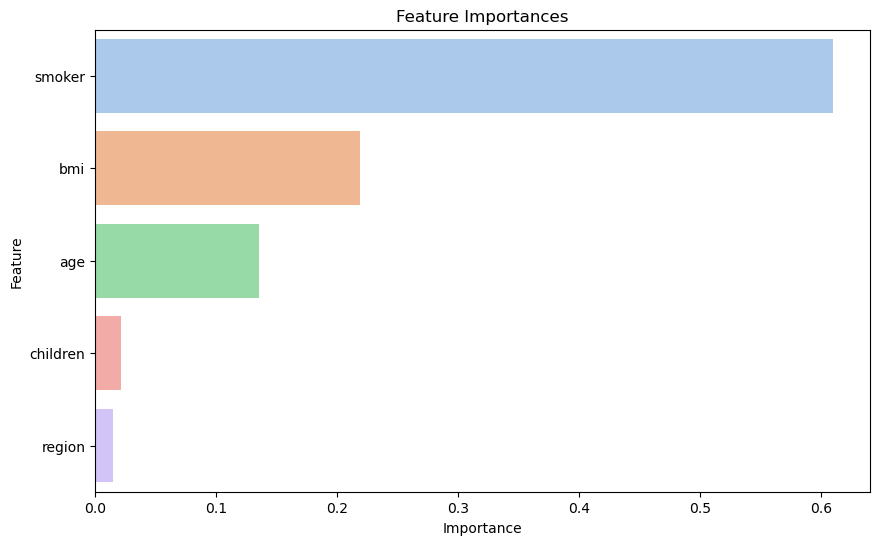

In [183]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df,palette='pastel')
plt.title('Feature Importances')
plt.show()

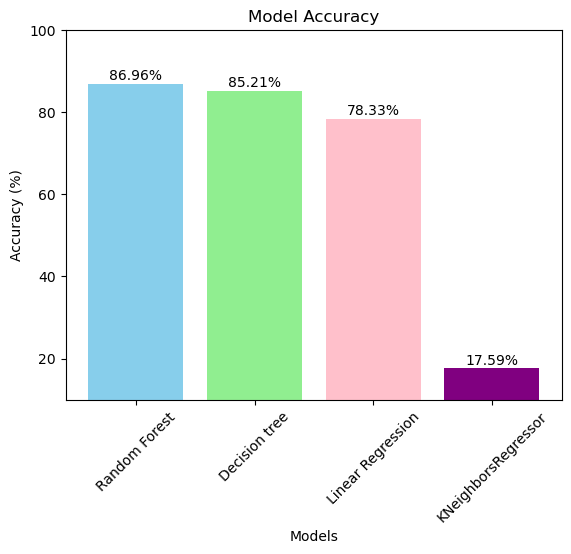

In [184]:
#bar chart for showing accuracies 
models = ['Random Forest','Decision tree','Linear Regression','KNeighborsRegressor']
accuracies = [r2_rf,r2_dt,r2_lr,r2_knn]
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'pink','purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.xticks(rotation=45)
plt.yticks(range(0, 101, 20))
plt.ylim(10,100)
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center')
plt.show()

Summary::
--> Data Loading and Exploration: Loads "insurance.csv" dataset (1338 rows, 7 columns: age, sex, bmi, children, smoker, region, charges); performs basic checks like shape, head, describe, info, dtypes, and null values (none present); identifies categorical (sex, smoker, region) and numeric columns.

--> Preprocessing: Encodes categorical columns using OrdinalEncoder from category_encoders; drops 'charges' (target y) and 'sex' for features (X); scales X 
using StandardScaler.

--> Train/Test Split: Splits data into 80% train (1070 samples) and 20% test (268 samples) with random_state=42.

--> Model Evaluation Visualization: Creates a bar chart comparing R² accuracies of four regression models (Random Forest, Decision Tree, Linear Regression, KNeighborsRegressor), though training code is not shown; accuracies plotted as percentages with labels.
